### Import Packages

In [105]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### Import Data

In [13]:
custs = np.genfromtxt('./Data/Hierarchical Clustering/customers.csv', delimiter = ',', skip_header = 1)

scaler = StandardScaler().fit(custs)
custs = scaler.transform(custs)

### Create Distance Functions

In [17]:
def minkowski_dist(x_1, x_2, p):
    return np.sum(np.abs(x_1 - x_2) ** p, axis = 1) ** (1 / p)

def taxicab_dist(x_1, x_2):
    return minkowski_dist(x_1, x_2, 1)

def euclidian_dist(x_1, x_2):
    return minkowski_dist(x_1, x_2, 2)

def chebychev_dist(x_1, x_2):
    return np.max(np.abs(x_1 - x_2))

def canberra_dist(x_1, x_2):
    return np.sum(np.abs(x_1 - x_2) / (np.abs(x_1) + np.abs(x_2)))

### Create Other Functions

In [95]:
def dist_matrix(clusters, data, dist_fn, agg_fn):
    dists = np.zeros([len(clusters), len(clusters)])
    keys = [key for key in clusters.keys()]
    for i in range(dists.shape[0] - 1):
        for j in range(i + 1, dists.shape[0]):
            point_a = agg_fn(data[clusters[keys[i]], :], axis = 0).reshape(1, -1)
            point_b = agg_fn(data[clusters[keys[j]], :], axis = 0).reshape(1, -1)
            dists[i, j] = euclidian_dist(point_a, point_b)
            dists[j, i] = dists[i, j]
    for i in range(len(clusters)):
        dists[i, i] = np.nan
    return dists

In [47]:
def initialize_clusters(data):
    clusters = {}
    for row in range(data.shape[0]):
        clusters[row] = [row]
    return clusters

In [93]:
def find_min_distance(data_matrix):
    minimum = np.nanmin(data_matrix.reshape(-1, 1))
    return np.where(data_matrix == minimum)[0]

In [92]:
def reassign_cluster(clusters, min_idx):
    keys = [key for key in clusters.keys()]
    clusters[keys[min_idx[0]]] = clusters[keys[min_idx[0]]] + clusters[keys[min_idx[1]]]
    del clusters[keys[min_idx[1]]]
    return clusters

In [118]:
def cluster(data, k):
    clusters = initialize_clusters(data)

    while len(clusters) > k:
        mat = dist_matrix(clusters, data, euclidian_dist, np.mean)
        min_idx = find_min_distance(mat)
        clusters = reassign_cluster(clusters, min_idx)
    
    return clusters

In [112]:
def plot_clusters(data, clusters):
    colors = [0] * data.shape[0]
    color_idx = 0
    for key, value in clusters.items():
        for val in value:
            colors[val] = 'C' + str(color_idx)
        color_idx += 1
            
    plt.scatter(data[:, 0], data[:, 1], color = colors)

### Perform Hierarchical Clustering

In [117]:
data = np.array([[1, 2],
                 [0, 0],
                 [3, 4],
                 [-1, -2],
                 [-2, -2]])

clusts = initialize_clusters(custs[:, 2:4])
loop = 0

while len(clusts) > 15:
    loop += 1
    if loop % 10 == 0: print('Starting loop: ' + str(loop))
    mat = dist_matrix(clusts, custs[:, 2:4], euclidian_dist, np.mean)
    min_idx = find_min_distance(mat)
    clusts = reassign_cluster(clusts, min_idx)



Starting loop: 10
Starting loop: 20
Starting loop: 30
Starting loop: 40
Starting loop: 50
Starting loop: 60
Starting loop: 70
Starting loop: 80
Starting loop: 90
Starting loop: 100
Starting loop: 110
Starting loop: 120
Starting loop: 130
Starting loop: 140
Starting loop: 150
Starting loop: 160
Starting loop: 170
Starting loop: 180
Starting loop: 190
Starting loop: 200
Starting loop: 210
Starting loop: 220
Starting loop: 230
Starting loop: 240
Starting loop: 250
Starting loop: 260
Starting loop: 270
Starting loop: 280
Starting loop: 290
Starting loop: 300
Starting loop: 310
Starting loop: 320
Starting loop: 330
Starting loop: 340
Starting loop: 350
Starting loop: 360
Starting loop: 370
Starting loop: 380
Starting loop: 390
Starting loop: 400
Starting loop: 410
Starting loop: 420


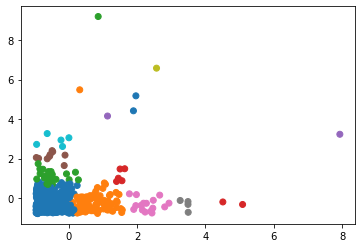

In [119]:
plot_clusters(custs[:, 2:4], clusts)